# Introduction

In this project, I build an image classification model using Convolutional Neural Networks (CNNs) in TensorFlow. The model is trained on the CIFAR-10 dataset, which contains 60,000 color images across 10 categories, such as airplanes, cars, cats, and dogs.

Traditional machine learning models struggle with image recognition because they do not consider spatial relationships between pixels. CNNs, however, use convolutional layers to detect features like edges, textures, and patterns, making them ideal for image classification tasks.

Project Goals:
* Load and preprocess CIFAR-10 images.
* Build a deep learning model using CNNs.
* Train and validate the model to ensure generalization.
* Evaluate the model on test data and visualize predictions.

### Import

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

### Neural Network

In [6]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Note: CIFAR-10 is a dataset that contains many categorical images that can be used to test the model.

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # scalling the pixel from 0 - 255 to 0 - 1

In [9]:
y_train, y_test = y_train.flatten(), y_test.flatten() # convert 2D to 1D

In [10]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),  # define input shape here

    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# compiling the model
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])  

### Train The Model

In [13]:
model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3299 - loss: 1.8200 - val_accuracy: 0.5461 - val_loss: 1.2375
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5694 - loss: 1.2158 - val_accuracy: 0.6540 - val_loss: 0.9830
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6413 - loss: 1.0182 - val_accuracy: 0.6865 - val_loss: 0.8934
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6830 - loss: 0.9139 - val_accuracy: 0.7208 - val_loss: 0.7995
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7163 - loss: 0.8132 - val_accuracy: 0.7133 - val_loss: 0.8117
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7330 - loss: 0.7568 - val_accuracy: 0.7247 - val_loss: 0.8079
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7553 - loss: 0.7081 - val_accuracy: 0.7370 - val_loss: 0.7610
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7696 -

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7453 - loss: 0.7699

Test Accuracy: 0.7453


### Result

In [16]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


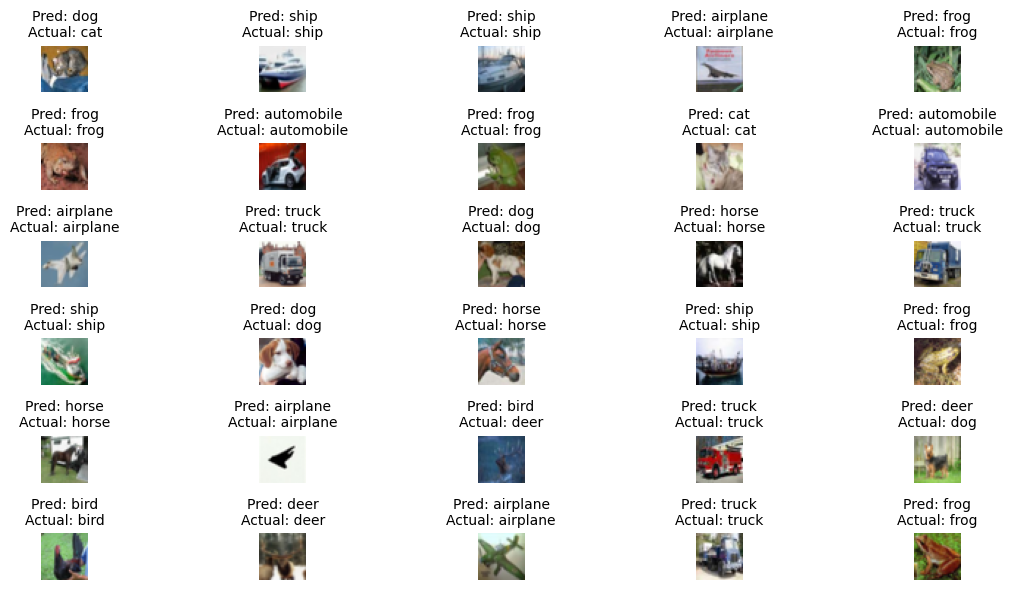

In [17]:
# define category names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# convert predictions from numerical to categorical names
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]
actual_labels = [class_names[y] for y in y_test]

correct_predictions = 0
total_images = 30  # change this value to test more images

# check accuracy on a subset of test images
for i in range(total_images):
    predicted_digit = np.argmax(predictions[i])
    actual_digit = y_test[i]
    
    if predicted_digit == actual_digit:
        correct_predictions += 1  # count correct predictions

# dynamic subset
cols = 5
rows = math.ceil(total_images / cols)

# display the first 'total_images' test images with predicted labels
plt.figure(figsize=(12, 6))
for j in range(total_images):
    plt.subplot(rows, cols, j + 1)  # arrange images in a 2-row grid
    plt.imshow(x_test[j])
    plt.title(f"Pred: {predicted_labels[j]}\nActual: {actual_labels[j]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
# calculate and print accuracy  
accuracy = (correct_predictions / total_images) * 100  
print(f"\nAccuracy for {total_images} test images: {accuracy:.2f}%")


Accuracy for 30 test images: 90.00%
